# TABLE OF CONTENTS
### [OVERVIEW OF OSEMiNl](#OVERVIEW-OF-OSEMiN)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# OVERVIEW OF OSEMiN


<img src='https://raw.githubusercontent.com/learn-co-curriculum/online-ds-ft-100719/master/osemind.png?token=AKWNGY6ANK33DJDTWNP7OOK5WTWRU' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html">Source: KDNuggets</a></center>

> ### The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
> ### It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 

- **[OBTAIN](#OBTAIN)**

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

- **[SCRUB](#SCRUB)**

During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

- **[EXPLORE](#EXPLORE)**

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

- **[MODEL](#MODEL)**

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

- **[iNTERPRET](#iNTERPRET)**

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  


## Additional Links
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# PROCESS CHECKLIST

1. **OBTAIN:**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ]  Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

In [1071]:
# PyPi package for cohort
!pip install -U fsds_100719 # comment out after install so it won't run again

Invalid requirement: '#'
Traceback (most recent call last):
  File "C:\Users\Ice Asortse\Anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\Ice Asortse\Anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\Ice Asortse\Anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\Ice Asortse\Anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\Ice Asortse\Anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\Ice Asortse\Anaconda3\envs\learn-env\lib\site-packages\

In [1072]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series_feature, series_target=None):#,max_unique=10):
    """Takes a series from a dataframe (df[col]), 
    reports back info on unique values, nulls, .describe() stats.
    
    
    Args:
        series (series (DataFrame column)): column to report    
    """
    dashes = '---'*25
    series=series_feature
    
    
    print(dashes)
    
    print(f"series dtype is {series.dtype}\n")
    print(f'- Unique Values for {series.name}')
    display(series.value_counts())#[:max_unique])
    
    print('n- Null Values ')
    nulls = series.isna().sum()
    print(nulls)
    
    print('\n\tDescribe')
    print(series.describe())
    
    if series.dtype != 'object':
        sns.distplot(series)
        plt.show()
    else:
        print(f"{series.name} is a string column and cannot be plotted")

    if series_target is not None:
        
        # Add your scatterplot here
        pass 

# OBTAIN

In [1073]:
!pip install -U fsds_100719
import IPython.display as disp
disp.clear_output()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline
inline_rc = dict(mpl.rcParams)

plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test

from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [1075]:
# Shortcut import of 
# import pandas as pd, numpy as np, etc...
import fsds_100719 as fs
from fsds_100719.imports import *

In [1076]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4CD3-443B

 Directory of C:\Users\Ice Asortse\FlatironData\ProjectMod1\dsc-v2-mod1-final-project-online-ds-ft-100719

10/27/2019  05:38 PM    <DIR>          .
10/27/2019  05:38 PM    <DIR>          ..
10/21/2019  01:12 PM               146 .gitignore
10/21/2019  02:00 PM    <DIR>          .ipynb_checkpoints
10/21/2019  01:12 PM                93 .learn
10/21/2019  01:12 PM         1,425,341 awesome.gif
10/21/2019  01:12 PM             1,120 column_names.md
10/21/2019  01:12 PM             1,846 CONTRIBUTING.md
10/21/2019  01:12 PM         2,475,934 kc_house_data.csv
10/21/2019  01:12 PM             1,354 LICENSE.md
10/21/2019  01:12 PM            79,134 module1_project_rubric.pdf
10/24/2019  12:47 PM         1,242,851 OSEMIN_scaffolding.ipynb
10/21/2019  01:12 PM            13,290 README.md
10/21/2019  01:12 PM            13,950 student.ipynb
10/27/2019  05:38 PM           151,781 study_group_starter.ipynb
              12 File(s) 

In [17]:
# importing data, displaying to top 5 rows getting basic info about the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [16]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

In [6]:
#getting basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
#checking the shape of the dataset
df.shape

(21597, 21)

In [8]:
# getting the 5 number summary of the the dataset 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#dropping columns id and date
data = df.drop(['id', 'date'], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
#finding Null values
data.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [11]:
#Number of NaNs the in KC house dataset by column
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
# find duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

4


In [13]:
# dropping duplicate values 
data.drop_duplicates(keep='first',inplace=True) 

In [14]:
#check for duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

0


In [1345]:
#taking care of the bedrooms and bathroom outlier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['bedrooms','bathrooms']

#data_clean = pd.DataFrame(data['price'])
for col in cols:
    var =scaler.fit_transform(data[col].values.reshape(-1, 1))
    data[col]= var.flatten()
data.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0
mean,541513.0,0.0,0.0,2086.0,15289.0,1.0,0.0,0.0,3.0,8.0,1794.0,1971.0,82.0,98077.0,48.0,-122.0,1991.0,12865.0
std,373063.0,1.0,1.0,920.0,42002.0,1.0,0.0,1.0,1.0,1.0,829.0,29.0,396.0,53.0,0.0,0.0,685.0,27787.0
min,82000.0,-3.0,-2.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,659.0
25%,320000.0,-0.0,-0.0,1430.0,5053.0,1.0,0.0,0.0,3.0,7.0,1200.0,1952.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,450000.0,-0.0,0.0,1920.0,7620.0,2.0,0.0,0.0,3.0,7.0,1570.0,1975.0,0.0,98065.0,48.0,-122.0,1850.0,7626.0
75%,643950.0,1.0,0.0,2550.0,10720.0,2.0,0.0,0.0,4.0,8.0,2220.0,1997.0,0.0,98117.0,48.0,-122.0,2370.0,10109.0
max,7700000.0,32.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1346]:
#removing outliers for bedrooms
data_clean['bedrooms'] =data_clean.loc[data_clean['bedrooms']<3]
data_clean.describe().round()

,bedrooms,bathrooms,price
count,15382.0,15425.0,11047.0
mean,-0.0,-0.0,535058.0
std,1.0,1.0,374226.0
min,-3.0,-2.0,82000.0
25%,-0.0,-0.0,316000.0
50%,-0.0,0.0,449888.0
75%,1.0,0.0,639000.0
max,3.0,8.0,7700000.0


In [24]:
# checking for missing values with placeholders
for col in data.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n\n')

price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 


bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
1800    0.005973
1820    0.005927
1480    0.005788
1720    0.005788
1540    0.005742
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
4800    0.005510
4500 

In [1334]:
# sqft_basement has a ? for roughly 2% 

In [21]:
# replace ? with nan
data.replace(['?',], np.nan, inplace=True)

In [23]:
#checking to make sure ? is replaced with nan
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(10), '\n\n')

price 
 450000.0    0.007966
350000.0    0.007966
550000.0    0.007363
500000.0    0.007039
425000.0    0.006947
325000.0    0.006854
400000.0    0.006715
375000.0    0.006391
300000.0    0.006159
525000.0    0.006067
Name: price, dtype: float64 


bedrooms 
 3     0.454823
4     0.318714
2     0.127773
5     0.074144
6     0.012597
1     0.009077
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248923
1.00    0.178345
1.75    0.141157
2.25    0.094753
2.00    0.089335
1.50    0.066920
2.75    0.054879
3.00    0.034872
3.50    0.033854
3.25    0.027277
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006391
1400    0.006252
1440    0.006159
1660    0.005974
1010    0.005974
1800    0.005974
1820    0.005928
1480    0.005789
1720    0.005789
1540    0.005743
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016579
6000    0.013430
4000    0.011624
7200    0.010188
4800    0.005511
7500    0.005511
4500 

In [27]:
data.shape

(21593, 19)

In [31]:
# Dropping Rows That Contain Null Values and checking for null values
data = data.dropna()
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
data.shape

(15425, 19)

In [33]:
data['waterfront'].value_counts()

0.0    15309
1.0      116
Name: waterfront, dtype: int64

In [34]:
#checking the data
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
15,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,3,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000


In [1339]:
#sorting w.r.t price
data = data.sort_values(by = 'price', ascending=False)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1162,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788


In [1340]:
#taking care of the bedrooms and bathroom outlier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['bedrooms','bathrooms']

#data_clean = pd.DataFrame(data['price'])
for col in cols:
    var =scaler.fit_transform(data[col].values.reshape(-1, 1))
    data[col]= var.flatten()
data.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0,15425.0
mean,541513.0,0.0,-0.0,2086.0,15289.0,1.0,0.0,0.0,3.0,8.0,1794.0,1971.0,82.0,98077.0,48.0,-122.0,1991.0,12865.0
std,373063.0,1.0,1.0,920.0,42002.0,1.0,0.0,1.0,1.0,1.0,829.0,29.0,396.0,53.0,0.0,0.0,685.0,27787.0
min,82000.0,-3.0,-2.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,659.0
25%,320000.0,-0.0,-0.0,1430.0,5053.0,1.0,0.0,0.0,3.0,7.0,1200.0,1952.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,450000.0,-0.0,0.0,1920.0,7620.0,2.0,0.0,0.0,3.0,7.0,1570.0,1975.0,0.0,98065.0,48.0,-122.0,1850.0,7626.0
75%,643950.0,1.0,0.0,2550.0,10720.0,2.0,0.0,0.0,4.0,8.0,2220.0,1997.0,0.0,98117.0,48.0,-122.0,2370.0,10109.0
max,7700000.0,32.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [1342]:
data.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16700,85000.0,-1.476038,-1.461968,910,9753,1.0,0.0,0.0,3,5,910,0.0,1947,0.0,98032,47.3897,-122.236,1160,7405
3763,84000.0,-1.476038,-1.461968,700,20130,1.0,0.0,0.0,3,6,700,0.0,1949,0.0,98168,47.4752,-122.271,1490,18630
18453,83000.0,-1.476038,-1.461968,900,8580,1.0,0.0,0.0,3,5,900,0.0,1918,0.0,98168,47.4727,-122.270,2060,6533
2139,82500.0,-1.476038,-1.461968,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,82000.0,-0.405616,-1.461968,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250


In [1344]:
data_clean['bedrooms'] =data_clean.loc[data_clean['bedrooms']<3]
data_clean.describe().round()

,bedrooms,bathrooms,price
count,15382.0,15425.0,11047.0
mean,-0.0,-0.0,535058.0
std,1.0,1.0,374226.0
min,-3.0,-2.0,82000.0
25%,-0.0,-0.0,316000.0
50%,-0.0,0.0,449888.0
75%,1.0,0.0,639000.0
max,3.0,8.0,7700000.0


In [1348]:
data_new = data.append(data_clean)
data_new.tail()

,bathrooms,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
15420,-1.461968,-1.476038,NaN,NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15421,-1.461968,-1.476038,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15422,-1.461968,-1.476038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15423,-1.461968,-1.476038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15424,-1.461968,-0.405616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1349]:
# Dropping Rows That Contain Null Values and checking for null values
data_fin = data_new.dropna()
data_fin.isna().sum()

bathrooms        0
bedrooms         0
condition        0
floors           0
grade            0
lat              0
long             0
price            0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_living15    0
sqft_lot         0
sqft_lot15       0
view             0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

In [1379]:
data_fin.describe()

,bathrooms,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
count,1.542500e+04,1.542500e+04,15425.000000,15425.00000,15425.000000,15425.000000,15425.000000,1.542500e+04,15425.000000,15425.000000,15425.000000,1.542500e+04,15425.000000,15425.000000,15425.000000,15425.000000,15425.000000,15425.000000
mean,2.948119e-17,2.948119e-17,3.411086,1.49436,7.663922,47.559261,-122.213499,5.415131e+05,1793.758055,2085.622366,1991.005575,1.528949e+04,12864.751637,0.228914,0.007520,1971.120972,81.787747,98077.475656
std,1.000032e+00,1.000032e+00,0.651876,0.53879,1.173758,0.138763,0.140482,3.730632e+05,829.211581,919.613805,684.829115,4.200230e+04,27786.675771,0.759992,0.086396,29.285630,395.717796,53.460506
min,-2.113784e+00,-2.546461e+00,1.000000,1.00000,3.000000,47.155900,-122.519000,8.200000e+04,370.000000,370.000000,399.000000,5.200000e+02,659.000000,0.000000,0.000000,1900.000000,0.000000,98001.000000
25%,-4.842450e-01,-4.056156e-01,3.000000,1.00000,7.000000,47.469000,-122.328000,3.200000e+05,1200.000000,1430.000000,1490.000000,5.053000e+03,5100.000000,0.000000,0.000000,1952.000000,0.000000,98033.000000
50%,1.675704e-01,-4.056156e-01,3.000000,1.50000,7.000000,47.571200,-122.229000,4.500000e+05,1570.000000,1920.000000,1850.000000,7.620000e+03,7626.000000,0.000000,0.000000,1975.000000,0.000000,98065.000000
75%,4.934782e-01,6.648071e-01,4.000000,2.00000,8.000000,47.677600,-122.124000,6.439500e+05,2220.000000,2550.000000,2370.000000,1.072000e+04,10109.000000,0.000000,0.000000,1997.000000,0.000000,98117.000000
max,7.663448e+00,3.170707e+01,5.000000,3.50000,13.000000,47.777600,-121.315000,7.700000e+06,9410.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,4.000000,1.000000,2015.000000,2015.000000,98199.000000


In [1350]:
data_fin.tail()

,bathrooms,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
16700,-1.461968,-1.476038,3.0,1.0,5.0,47.3897,-122.236,85000.0,910.0,0.0,910.0,1160.0,9753.0,7405.0,0.0,0.0,1947.0,0.0,98032.0
3763,-1.461968,-1.476038,3.0,1.0,6.0,47.4752,-122.271,84000.0,700.0,0.0,700.0,1490.0,20130.0,18630.0,0.0,0.0,1949.0,0.0,98168.0
18453,-1.461968,-1.476038,3.0,1.0,5.0,47.4727,-122.270,83000.0,900.0,0.0,900.0,2060.0,8580.0,6533.0,0.0,0.0,1918.0,0.0,98168.0
2139,-1.461968,-1.476038,2.0,1.0,5.0,47.4799,-122.296,82500.0,520.0,0.0,520.0,1572.0,22334.0,10570.0,0.0,0.0,1951.0,0.0,98168.0
8267,-1.461968,-0.405616,3.0,1.0,6.0,47.4987,-122.341,82000.0,860.0,0.0,860.0,1140.0,10426.0,11250.0,0.0,0.0,1954.0,0.0,98146.0


In [1351]:
data_fin.describe()

,bathrooms,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
count,1.542500e+04,1.542500e+04,15425.000000,15425.00000,15425.000000,15425.000000,15425.000000,1.542500e+04,15425.000000,15425.000000,15425.000000,1.542500e+04,15425.000000,15425.000000,15425.000000,15425.000000,15425.000000,15425.000000
mean,2.948119e-17,2.948119e-17,3.411086,1.49436,7.663922,47.559261,-122.213499,5.415131e+05,1793.758055,2085.622366,1991.005575,1.528949e+04,12864.751637,0.228914,0.007520,1971.120972,81.787747,98077.475656
std,1.000032e+00,1.000032e+00,0.651876,0.53879,1.173758,0.138763,0.140482,3.730632e+05,829.211581,919.613805,684.829115,4.200230e+04,27786.675771,0.759992,0.086396,29.285630,395.717796,53.460506
min,-2.113784e+00,-2.546461e+00,1.000000,1.00000,3.000000,47.155900,-122.519000,8.200000e+04,370.000000,370.000000,399.000000,5.200000e+02,659.000000,0.000000,0.000000,1900.000000,0.000000,98001.000000
25%,-4.842450e-01,-4.056156e-01,3.000000,1.00000,7.000000,47.469000,-122.328000,3.200000e+05,1200.000000,1430.000000,1490.000000,5.053000e+03,5100.000000,0.000000,0.000000,1952.000000,0.000000,98033.000000
50%,1.675704e-01,-4.056156e-01,3.000000,1.50000,7.000000,47.571200,-122.229000,4.500000e+05,1570.000000,1920.000000,1850.000000,7.620000e+03,7626.000000,0.000000,0.000000,1975.000000,0.000000,98065.000000
75%,4.934782e-01,6.648071e-01,4.000000,2.00000,8.000000,47.677600,-122.124000,6.439500e+05,2220.000000,2550.000000,2370.000000,1.072000e+04,10109.000000,0.000000,0.000000,1997.000000,0.000000,98117.000000
max,7.663448e+00,3.170707e+01,5.000000,3.50000,13.000000,47.777600,-121.315000,7.700000e+06,9410.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,4.000000,1.000000,2015.000000,2015.000000,98199.000000


# EXPLORE

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

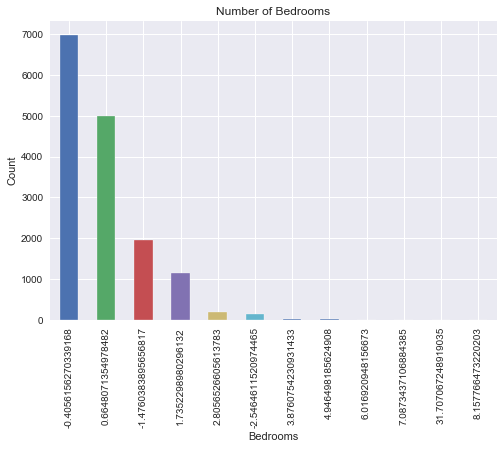

In [1366]:
#checking to see which house is the most common(bedroom wise)
data_fin['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [1353]:
# from the visualization, it is clear that most houses are 3 bedrooms followed by 4 bedrooms

<Figure size 720x720 with 0 Axes>

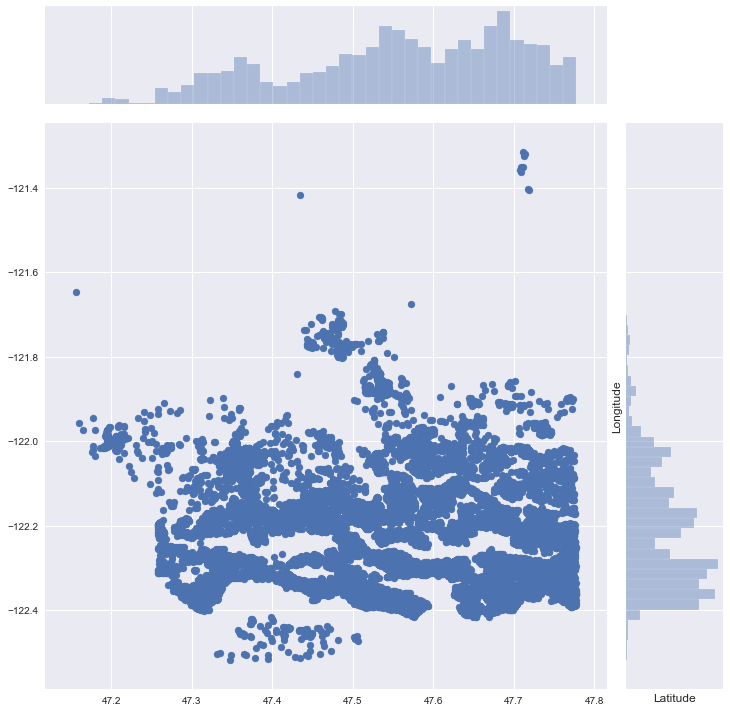

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [1367]:
# see common locations and the spread of houses
plt.figure(figsize=(10,10))
sns.jointplot(x=data_fin.lat.values, y=data_fin.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [1368]:
# From the beautiful visualization using seaborn, we can see that between -47.7 and 47.8 also longitude -122.2 to -122.4 is a very popular location where the most buys occured

In [1369]:
# Lets find out if Price is affected by living area of the house or not.

Text(0.5, 1.0, 'Price Vs Square Feet Living')

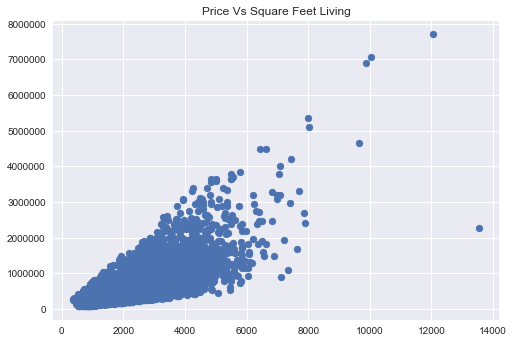

In [1371]:
plt.scatter(data_fin.sqft_living, data_fin.price)
plt.title('Price Vs Square Feet Living')

In [1358]:
# From the visualization above, it shows a linear direction though the house with the highest square feet is sold for less. maybe its just an outlier.

Text(0.5, 1.0, 'Price Vs Location of the area')

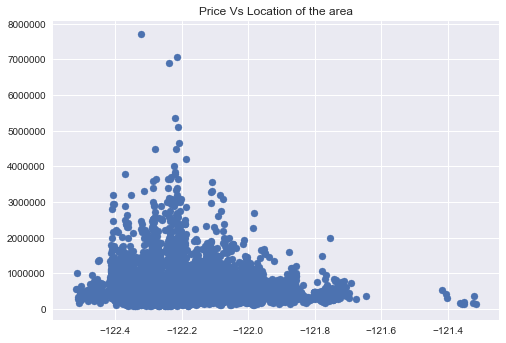

In [1372]:
plt.scatter(data_fin.long, data_fin.price)
plt.title('Price Vs Location of the area')

In [1360]:
# The Price vs Longitude location tells us another interesting observation that the -122.2 to -122.4 seels as a higher rate. if thime permits, we can dig deeper!!

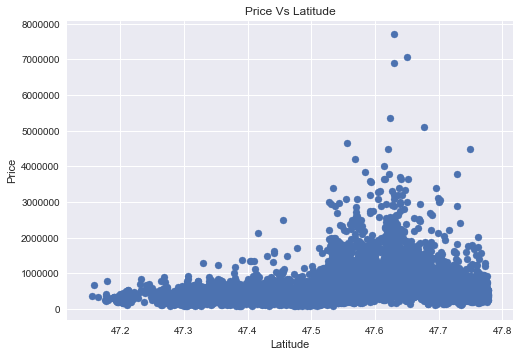

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [1373]:
plt.scatter(data_fin.lat, data_fin.price)
plt.title('Price Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()
sns.despine

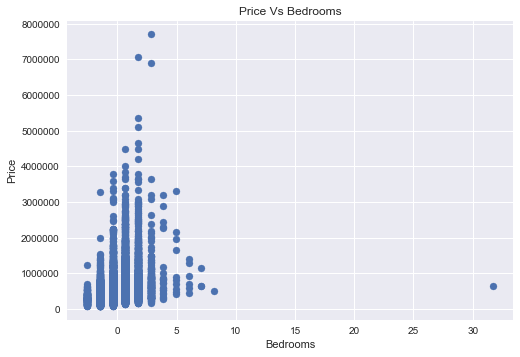

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [1374]:
plt.scatter(data_fin.bedrooms, data_fin.price)
plt.title('Price Vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine


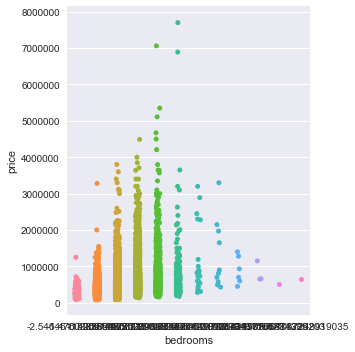

In [1375]:
sns.catplot(x='bedrooms', y='price', data=data_fin)

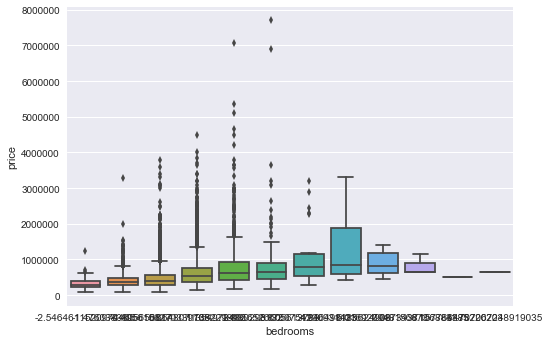

In [1376]:
# Total Rooms vs Sale Price
sns.boxplot(x=data_fin['bedrooms'], y=data_fin['price'])

In [1377]:
#checking the number of unique values
bedrooms_c = np.unique(data_fin['bedrooms'])
bedrooms_c

array([-2.54646115, -1.47603839, -0.40561563,  0.66480714,  1.7352299 ,
        2.80565266,  3.87607542,  4.94649819,  6.01692095,  7.08734371,
        8.15776647, 31.70706725])

In [1278]:
#here we can see more factors that are affecting price also an outlier 

Text(0.5, 1.0, 'Price Vs waterfront (0= no waterfront)')

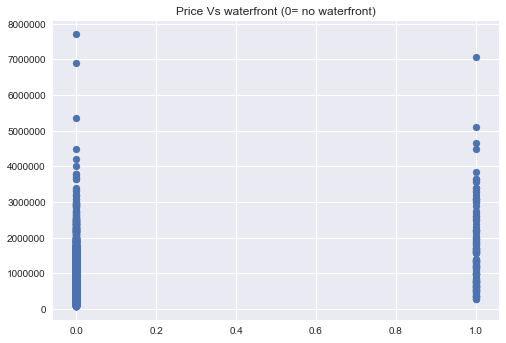

In [1378]:
# visualization for price vs waterfront
plt.scatter(data_fin.waterfront, data_fin.price)
plt.title('Price Vs waterfront (0= no waterfront)')

In [1280]:
# checking for unique values
waterfront_c = np.unique(data['waterfront'])
waterfront_c

array([0., 1.])

Text(0.5, 1.0, 'Price Vs floors')

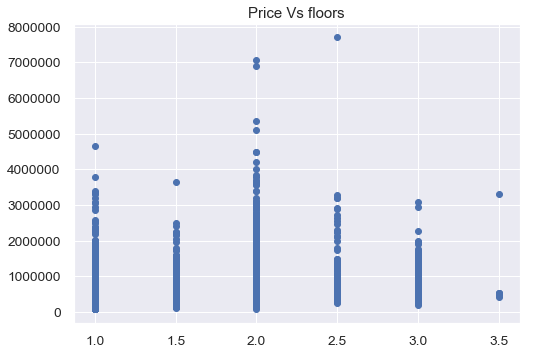

In [1281]:
# visualization for price vs floors
plt.scatter(data.floors, data.price)
plt.title('Price Vs floors')

In [1282]:
#unique values for floors
floors_c = np.unique(data['floors'])
floors_c

array([1. , 1.5, 2. , 2.5, 3. , 3.5])

Text(0.5, 1.0, 'Price Vs Condition')

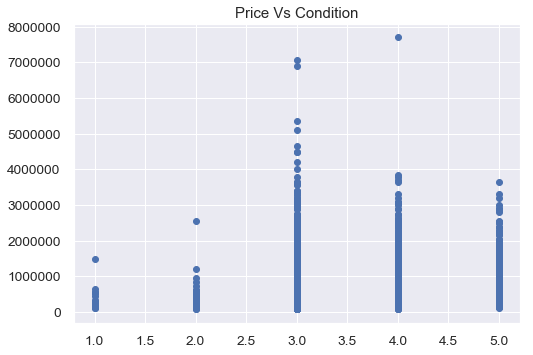

In [1283]:
#visualization for condition
plt.scatter(data.condition, data.price)
plt.title('Price Vs Condition')

In [1284]:
#unique values for condition
condition_c = np.unique(data['condition'])
condition_c

array([1, 2, 3, 4, 5], dtype=int64)

Text(0.5, 1.0, 'Price by Zipcode')

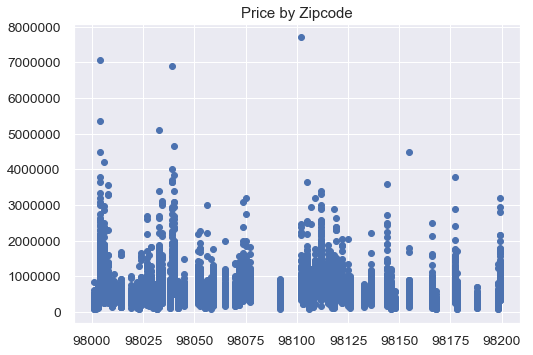

In [1285]:
#visualization for zipcode
plt.scatter(data.zipcode, data.price)
plt.title('Price by Zipcode')

In [1286]:
# unique values for zipcode
zipcode_c = np.unique(data['zipcode'])
zipcode_c

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

Text(0.5, 1.0, 'Price Vs view')

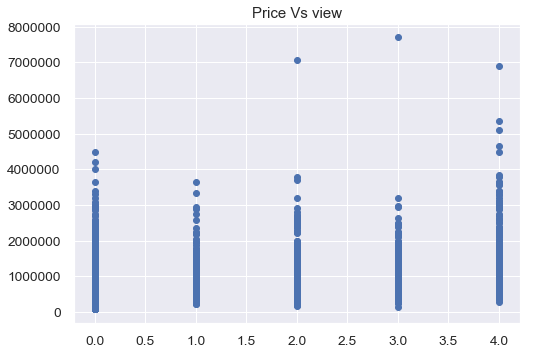

In [1287]:
##visualization for view
plt.scatter(data.view, data.price)
plt.title('Price Vs view')

In [1288]:
#unique values for view
view_c = np.unique(data['view'])
view_c

array([0., 1., 2., 3., 4.])

Text(0.5, 1.0, 'Price Vs bathrooms')

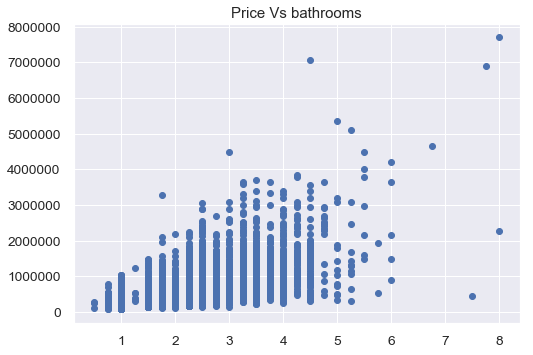

In [1289]:
#vasualization for bathrooms
plt.scatter(data.bathrooms, data.price)
plt.title('Price Vs bathrooms')

In [1290]:
#unique values for bathrooms 
bathrooms_c = np.unique(data['bathrooms'])
bathrooms_c

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75,
       6.  , 6.75, 7.5 , 7.75, 8.  ])

Text(0.5, 1.0, 'Price Vs grade')

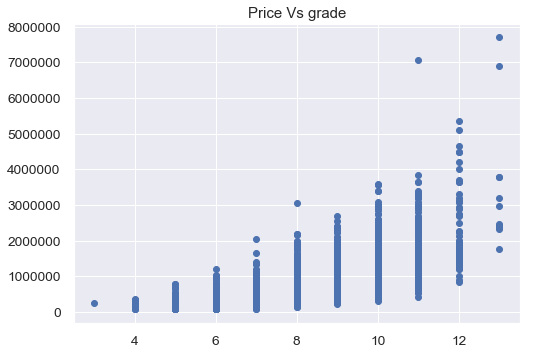

In [1291]:
#visualization for grade
plt.scatter(data.grade, data.price)
plt.title('Price Vs grade')

In [1292]:
#unique values for grade
grade_c = np.unique(data['grade'])
grade_c

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

Text(0.5, 1.0, 'Price Vs yr_built')

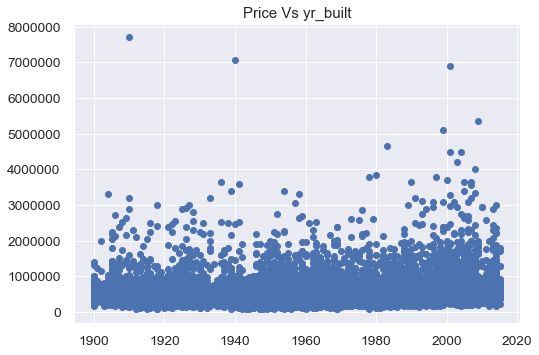

In [1293]:
#visualization for yr_built
plt.scatter(data.yr_built, data.price)
plt.title('Price Vs yr_built')

Text(0.5, 1.0, 'Price Vs yr-renovated')

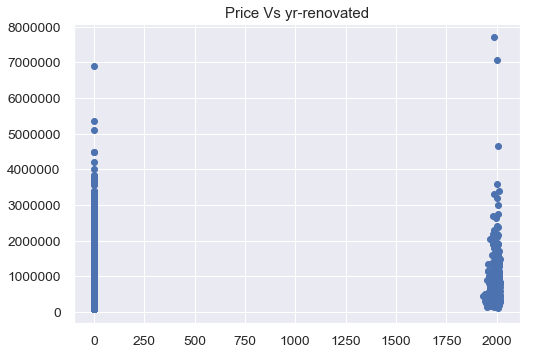

In [1294]:
#visualization for yr_renovated
plt.scatter(data.yr_renovated, data.price)
plt.title('Price Vs yr-renovated')

In [1295]:
#unique values for yr_ renovated
yr_renovated_c = np.unique(data['yr_renovated'])
yr_renovated_c

array([   0., 1934., 1940., 1944., 1945., 1948., 1950., 1951., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1962., 1963.,
       1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015.])

Text(0.5, 1.0, 'Price Vs sqft_lot')

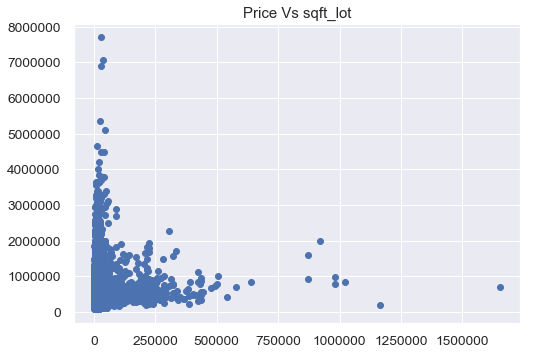

In [1296]:
#visuals for sqft lot
plt.scatter(data.sqft_lot, data.price)
plt.title('Price Vs sqft_lot')

Text(0.5, 1.0, 'Price Vs sqft_above')

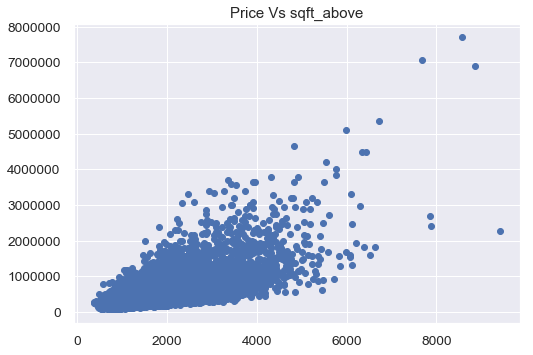

In [1297]:
#visuals for sqft above
plt.scatter(data.sqft_above, data.price)
plt.title('Price Vs sqft_above')

Text(0.5, 1.0, 'Price Vs sqft_living15')

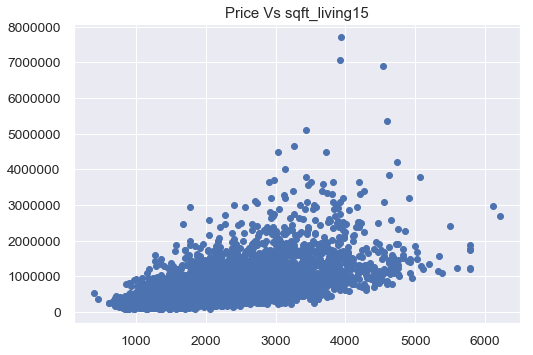

In [1298]:
#visuals for sqft living15
plt.scatter(data.sqft_living15, data.price)
plt.title('Price Vs sqft_living15')

Text(0.5, 1.0, 'Price Vs sqft_lot15')

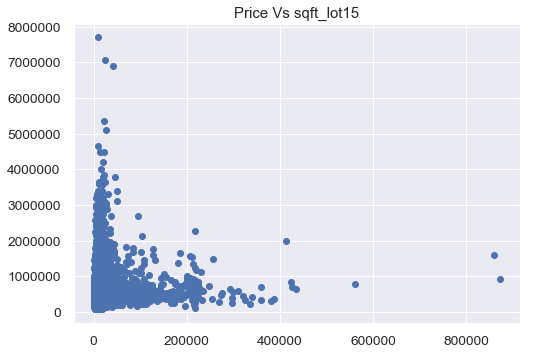

In [1299]:
#visuals for sqft lot15
plt.scatter(data.sqft_lot15, data.price)
plt.title('Price Vs sqft_lot15')

Text(0.5, 1.0, 'Price Vs sqft_basement')

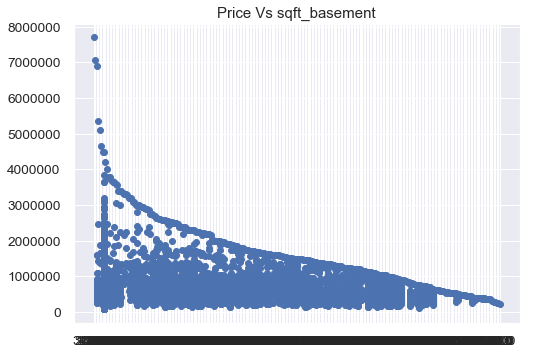

In [1300]:
#visuals for sqft basement
plt.scatter(data.sqft_basement, data.price)
plt.title('Price Vs sqft_basement')

In [1301]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1162,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788


In [1302]:
#checking to see the total unique values of each categorical variable
data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated', 'zipcode', 'condition', 'grade', 'yr_built']].nunique()

bedrooms         12
bathrooms        27
floors            6
waterfront        2
view              5
yr_renovated     69
zipcode          70
condition         5
grade            11
yr_built        116
dtype: int64

In [1217]:
#checking to see something real quick
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['bedrooms','bathrooms']

#data_clean = pd.DataFrame(data['price'])
for col in cols:
    var =scaler.fit_transform(data[col].values.reshape(-1, 1))
    data[col]= var.flatten()
data.describe().round()
    

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0
mean,-0.0,0.0,3.0,1.0,8.0,541525.0,1794.0,1991.0,15290.0,12865.0,2.0,82.0
std,1.0,1.0,1.0,1.0,1.0,373072.0,829.0,685.0,42004.0,27787.0,1.0,396.0
min,-2.0,-3.0,1.0,1.0,3.0,82000.0,370.0,399.0,520.0,659.0,0.0,0.0
25%,-0.0,-0.0,3.0,1.0,7.0,320000.0,1200.0,1490.0,5054.0,5100.0,1.0,0.0
50%,0.0,-0.0,3.0,2.0,7.0,450000.0,1570.0,1850.0,7620.0,7626.0,2.0,0.0
75%,0.0,1.0,4.0,2.0,8.0,643962.0,2220.0,2370.0,10720.0,10110.0,3.0,0.0
max,8.0,32.0,5.0,4.0,13.0,7700000.0,9410.0,6210.0,1651359.0,871200.0,3.0,2015.0


In [1218]:
#checking for multicolinearity of features

data.corr()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
bathrooms,1.000000,0.511544,-0.131536,0.507494,0.665356,0.525686,0.685563,0.569774,0.080320,0.083064,0.499052,0.046838
bedrooms,0.511544,1.000000,0.019896,0.182233,0.354771,0.305842,0.473511,0.389215,0.025199,0.024867,0.161524,0.017992
condition,-0.131536,0.019896,1.000000,-0.260755,-0.148948,0.033129,-0.157948,-0.097153,-0.017694,-0.007308,-0.354597,-0.061601
floors,0.507494,0.182233,-0.260755,1.000000,0.461001,0.260317,0.530226,0.283614,-0.009923,-0.014077,0.477920,-0.001386
grade,0.665356,0.354771,-0.148948,0.461001,1.000000,0.664519,0.759405,0.717498,0.109249,0.118425,0.430726,0.011927
price,0.525686,0.305842,0.033129,0.260317,0.664519,1.000000,0.612385,0.583385,0.084666,0.080541,0.049861,0.120970
sqft_above,0.685563,0.473511,-0.157948,0.530226,0.759405,0.612385,1.000000,0.732208,0.173920,0.186472,0.417559,0.017211
sqft_living15,0.569774,0.389215,-0.097153,0.283614,0.717498,0.583385,0.732208,1.000000,0.143430,0.180785,0.320882,-0.005289
sqft_lot,0.080320,0.025199,-0.017694,-0.009923,0.109249,0.084666,0.173920,0.143430,1.000000,0.716492,0.055446,0.000834
sqft_lot15,0.083064,0.024867,-0.007308,-0.014077,0.118425,0.080541,0.186472,0.180785,0.716492,1.000000,0.076106,0.000538


In [1219]:
abs(data.corr()) > 0.75

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
bathrooms,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,True,False,False,False,False,False
price,False,False,False,False,False,True,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,True,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,False,False,False,False,True,False,False,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True,False,False


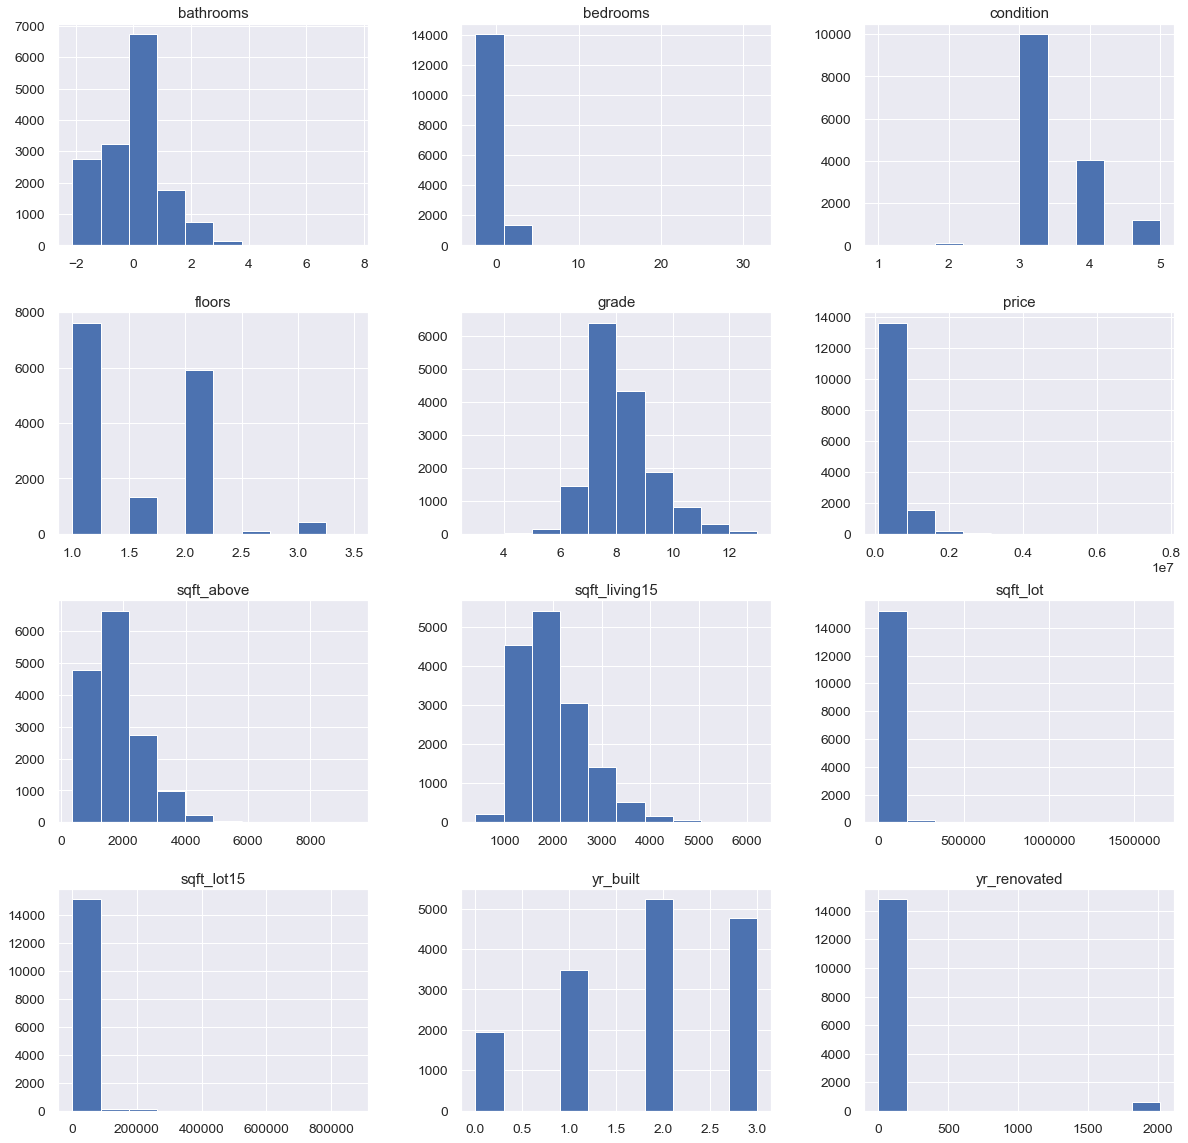

In [1220]:
data.hist(figsize=(20,20));

In [1221]:
# pd.plotting.scatter_matrix(data, figsize=(20,20));

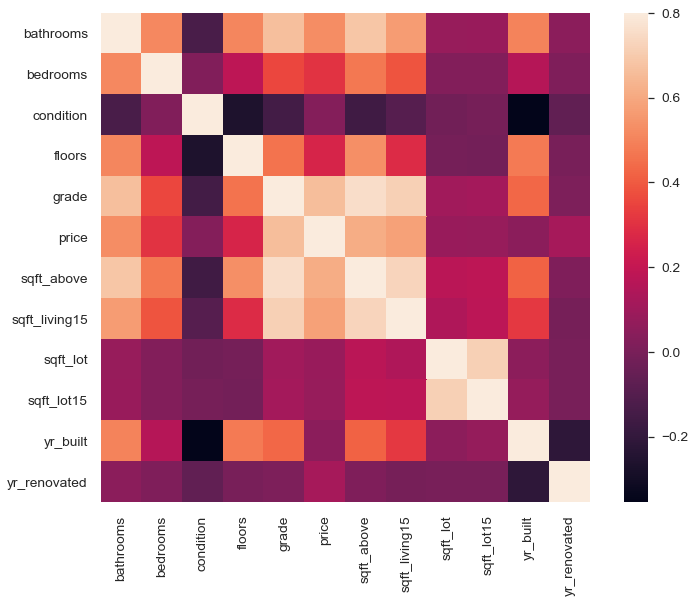

In [1222]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

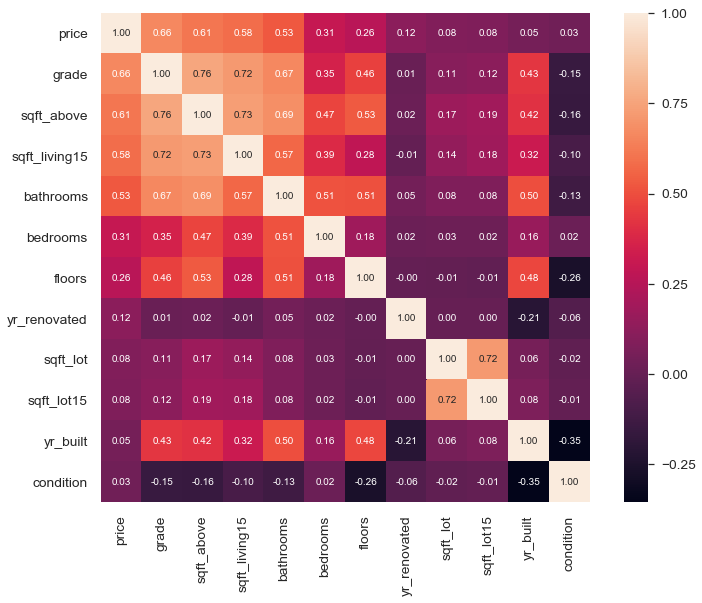

In [1223]:
# Top 15 Heatmap
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
data = data.drop(['sqft_living'], axis=1)

In [1225]:
data.tail()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
16700,-1.4619,-1.476022,3.0,1.0,5.0,85000.0,910.0,0.0,1160.0,9753.0,7405.0,1.0,0.0
3763,-1.4619,-1.476022,3.0,1.0,6.0,84000.0,700.0,0.0,1490.0,20130.0,18630.0,1.0,0.0
18453,-1.4619,-1.476022,3.0,1.0,5.0,83000.0,900.0,0.0,2060.0,8580.0,6533.0,0.0,0.0
2139,-1.4619,-1.476022,2.0,1.0,5.0,82500.0,520.0,0.0,1572.0,22334.0,10570.0,1.0,0.0
8267,-1.4619,-0.405530,3.0,1.0,6.0,82000.0,860.0,0.0,1140.0,10426.0,11250.0,1.0,0.0


In [1226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['bedrooms','bathrooms']

#data_clean = pd.DataFrame(data['price'])
for col in cols:
    var =scaler.fit_transform(data[col].values.reshape(-1, 1))
    data[col]= var.flatten()
data.describe().round()
    

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0,15424.0
mean,0.0,0.0,3.0,1.0,8.0,541525.0,1794.0,1991.0,15290.0,12865.0,2.0,82.0
std,1.0,1.0,1.0,1.0,1.0,373072.0,829.0,685.0,42004.0,27787.0,1.0,396.0
min,-2.0,-3.0,1.0,1.0,3.0,82000.0,370.0,399.0,520.0,659.0,0.0,0.0
25%,-0.0,-0.0,3.0,1.0,7.0,320000.0,1200.0,1490.0,5054.0,5100.0,1.0,0.0
50%,0.0,-0.0,3.0,2.0,7.0,450000.0,1570.0,1850.0,7620.0,7626.0,2.0,0.0
75%,0.0,1.0,4.0,2.0,8.0,643962.0,2220.0,2370.0,10720.0,10110.0,3.0,0.0
max,8.0,32.0,5.0,4.0,13.0,7700000.0,9410.0,6210.0,1651359.0,871200.0,3.0,2015.0


In [1069]:
data_clean['bedrooms'] =data_clean.loc[data_clean['bedrooms']<3]
data_clean.describe().round()

,bedrooms,bathrooms
count,15382.0,15425.0
mean,-0.0,-0.0
std,1.0,1.0
min,-3.0,-2.0
25%,-0.0,-0.0
50%,-0.0,0.0
75%,1.0,0.0
max,3.0,8.0


In [1163]:
data_clean.head()

,bedrooms,bathrooms,price
0,2.805653,7.663448,NaN
1,1.735230,3.100740,538000.0
2,2.805653,7.337540,NaN
3,1.735230,3.752555,604000.0
4,1.735230,4.078463,510000.0


In [1227]:
# Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_yr_built =  bins_yr_built.cat.as_ordered()
bins_yr_built.head()

7245    (1899, 1930]
3910    (1930, 1960]
9245    (1990, 2015]
1446    (1990, 2015]
1162    (1990, 2015]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1899, 1930] < (1930, 1960] < (1960, 1990] < (1990, 2015]]

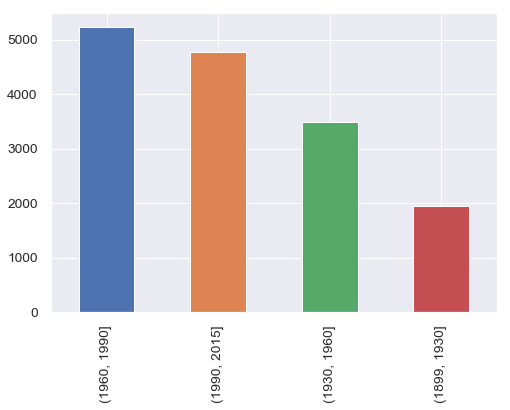

In [1228]:
 #Inspect the result
bins_yr_built.value_counts().plot(kind='bar')

In [1229]:
data['yr_built'] = bins_yr_built

In [1230]:
data['yr_built'] = data['yr_built'].cat.codes

In [1231]:
data.head()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
7245,7.663292,2.805948,4.0,2.5,13.0,7700000.0,8570.0,3480.0,3940.0,27600.0,8800.0,0,1987.0
3910,3.100696,1.735456,3.0,2.0,11.0,7060000.0,7680.0,2360.0,3930.0,37325.0,25449.0,1,2001.0
9245,7.337392,2.805948,3.0,2.0,13.0,6890000.0,8860.0,1030.0,4540.0,31374.0,42730.0,3,0.0
1446,3.752495,1.735456,3.0,2.0,12.0,5350000.0,6720.0,1280.0,4600.0,23985.0,21750.0,3,0.0
1162,4.078395,1.735456,3.0,2.0,12.0,5110000.0,5990.0,2020.0,3430.0,45517.0,26788.0,3,0.0


In [36]:
data = data.drop(['waterfront','zipcode','lat','long','view'], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
1,538000.0,3,2.25,7242,2.0,3,7,2170,400.0,1951,1991.0,1690,7639
3,604000.0,4,3.00,5000,1.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,8080,1.0,3,8,1680,0.0,1987,0.0,1800,7503
5,1230000.0,4,4.50,101930,1.0,3,11,3890,1530.0,2001,0.0,4760,101930
8,229500.0,3,1.00,7470,1.0,3,7,1050,730.0,1960,0.0,1780,8113


In [37]:
data_pred = data.iloc[:,1:10]
data_pred.head()

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
1,3,2.25,7242,2.0,3,7,2170,400.0,1951
3,4,3.00,5000,1.0,5,7,1050,910.0,1965
4,3,2.00,8080,1.0,3,8,1680,0.0,1987
5,4,4.50,101930,1.0,3,11,3890,1530.0,2001
8,3,1.00,7470,1.0,3,7,1050,730.0,1960


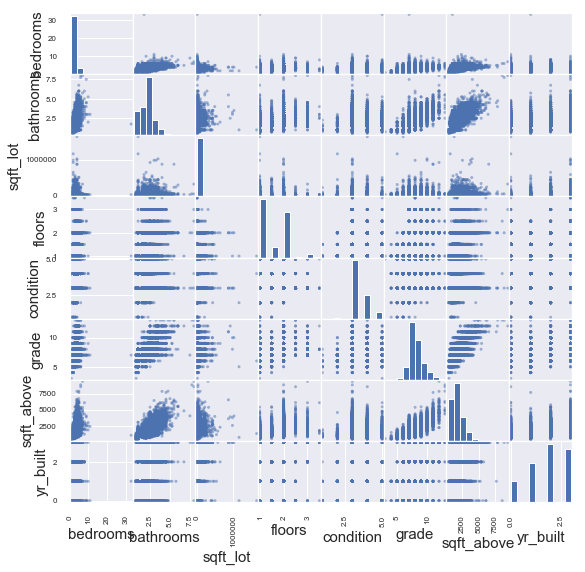

In [1151]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

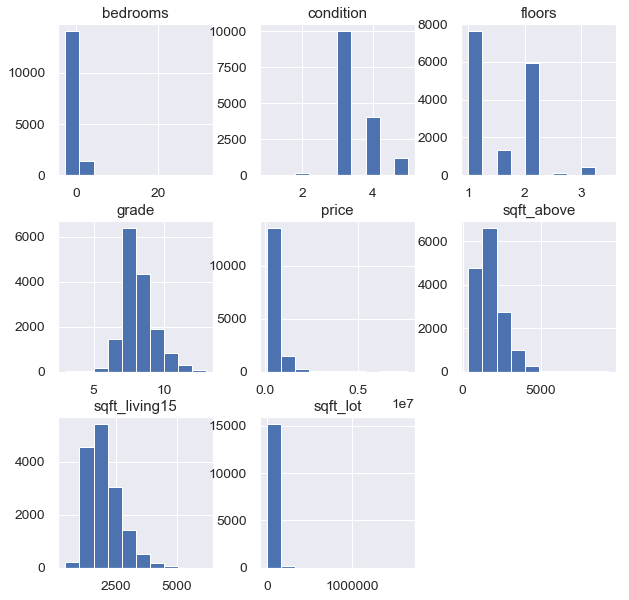

In [1234]:
data_pred.hist(figsize = [10,10]);

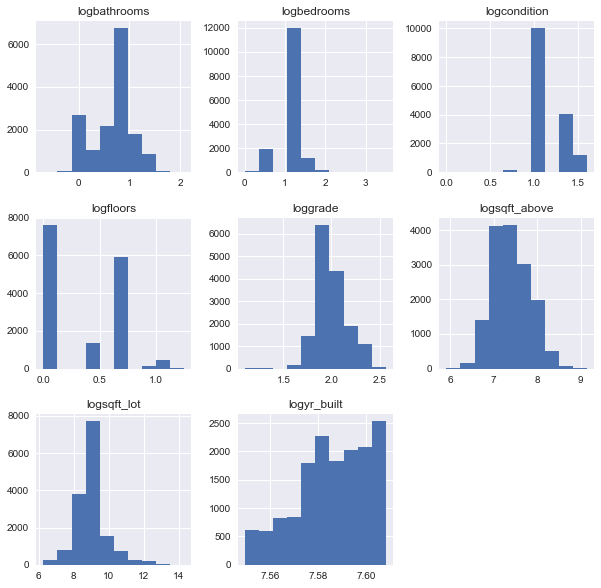

In [38]:
data_log = pd.DataFrame([])
data_log['logbedrooms'] = np.log(data_pred['bedrooms'])
data_log['logbathrooms'] = np.log(data_pred['bathrooms'])
data_log['logcondition'] = np.log(data_pred['condition'])
data_log['logfloors'] = np.log(data_pred['floors'])
data_log['loggrade'] = np.log(data_pred['grade'])
data_log['logsqft_above'] = np.log(data_pred['sqft_above'])
data_log['logsqft_lot'] = np.log(data_pred['sqft_lot'])
data_log['logyr_built'] = np.log(data_pred['yr_built'])
data_log.hist(figsize  = (10, 10));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


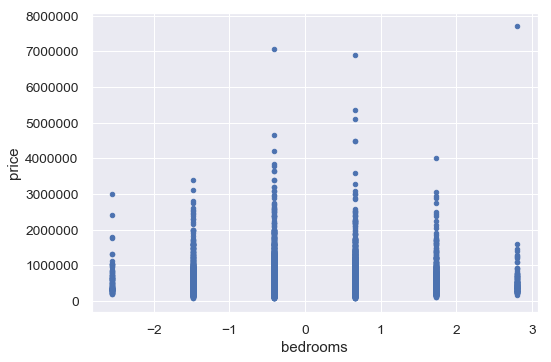

In [1236]:
data_clean.plot(kind='scatter', x='bedrooms', y='price')

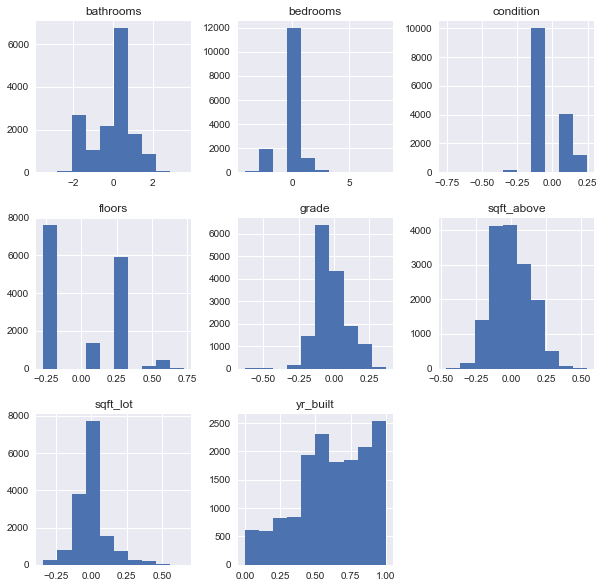

In [39]:
yr_built = data_pred['yr_built']
logbathrooms = data_log['logbathrooms']
logbedrooms = data_log['logbedrooms']
logcondition = data_log['logcondition']
logfloors = data_log['logfloors']
loggrade = data_log['loggrade']
logsqft_above = data_log['logsqft_above']
logsqft_lot = data_log['logsqft_lot']

scaled_yr_built = (yr_built - min(yr_built)) / (max(yr_built) - min(yr_built))
scaled_bathrooms = (logbathrooms - np.mean(logbathrooms)) / np.sqrt(np.var(logbathrooms))
scaled_bedrooms = (logbedrooms - np.mean(logbedrooms)) / np.sqrt(np.var(logbedrooms))
scaled_condition = (logcondition - np.mean(logcondition)) / (max(logcondition) - min(logcondition))
scaled_floors = (logfloors - np.mean(logfloors)) / (max(logfloors) - min(logfloors))
scaled_grade = (loggrade - np.mean(loggrade)) / (max(loggrade) - min(loggrade))
scaled_sqft_above = (logsqft_above - np.mean(logsqft_above)) / (max(logsqft_above) - min(logsqft_above))
scaled_sqft_lot = (logsqft_lot - np.mean(logsqft_lot)) / (max(logsqft_lot) - min(logsqft_lot))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['yr_built'] = scaled_yr_built
data_cont_scaled['bathrooms'] = scaled_bathrooms
data_cont_scaled['bedrooms'] = scaled_bedrooms
data_cont_scaled['condition'] = scaled_condition
data_cont_scaled['floors'] = scaled_floors
data_cont_scaled['sqft_above'] = scaled_sqft_above
data_cont_scaled['sqft_lot'] = scaled_sqft_lot
data_cont_scaled['grade'] = scaled_grade


data_cont_scaled.hist(figsize = [10, 10]);

In [1238]:
data_cont_scaled.head()

,yr_built,bathrooms,bedrooms,condition,floors,sqft_above,sqft_lot,grade
7245,0.000000,3.578493,2.16629,0.109444,0.461000,0.512317,0.152379,0.368044
3910,0.333333,2.106244,1.52109,-0.069303,0.282879,0.478433,0.189814,0.254118
9245,1.000000,3.497254,2.16629,-0.069303,0.282879,0.522601,0.168274,0.368044
1446,1.000000,2.375841,1.52109,-0.069303,0.282879,0.437169,0.134968,0.313457
1162,1.000000,2.500686,1.52109,-0.069303,0.282879,0.401633,0.214422,0.313457


In [1239]:
data_cont_scaled.describe()

,yr_built,bathrooms,bedrooms,condition,floors,sqft_above,sqft_lot,grade
count,15425.000000,1.542500e+04,1.542500e+04,1.542500e+04,1.542500e+04,1.542500e+04,1.542500e+04,1.542500e+04
mean,0.610459,-2.948119e-17,-4.422178e-17,-3.915471e-17,6.633268e-17,-7.738812e-17,1.538550e-16,2.653307e-16
std,0.335127,1.000032e+00,1.000032e+00,1.125667e-01,2.810485e-01,1.319444e-01,1.122610e-01,1.016307e-01
min,0.000000,-3.516043e+00,-4.174390e+00,-7.519096e-01,-2.704158e-01,-4.587882e-01,-3.401926e-01,-6.319563e-01
25%,0.333333,-3.104570e-01,-2.866203e-01,-6.930341e-02,-2.704158e-01,-9.520211e-02,-5.818473e-02,-5.412336e-02
50%,0.666667,3.326096e-01,-2.866203e-01,-6.930341e-02,5.324086e-02,-1.215144e-02,-7.238439e-03,-5.412336e-02
75%,1.000000,6.022075e-01,7.314293e-01,1.094435e-01,2.828789e-01,9.490321e-02,3.509356e-02,3.694123e-02
max,1.000000,3.578493e+00,8.199053e+00,2.480904e-01,7.295842e-01,5.412118e-01,6.598074e-01,3.680437e-01


# MODEL

In [1240]:
price = data['price']
data_ols = pd.concat([price, data_cont_scaled], axis=1)
data_ols.head()

,price,yr_built,bathrooms,bedrooms,condition,floors,sqft_above,sqft_lot,grade
1,538000.0,0.333333,0.332610,-0.286620,-0.069303,0.282879,0.087864,-0.013548,-0.054123
3,604000.0,0.666667,1.068734,0.731429,0.248090,-0.270416,-0.136466,-0.059492,-0.054123
4,510000.0,0.666667,0.031225,-0.286620,-0.069303,-0.270416,0.008775,0.000031,0.036941
5,1230000.0,1.000000,2.106244,0.731429,-0.069303,-0.270416,0.268234,0.314406,0.254118
8,229500.0,0.333333,-1.742409,-0.286620,-0.069303,-0.270416,-0.136466,-0.009704,-0.054123


In [1241]:
data_cont_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15425 entries, 7245 to 8267
Data columns (total 8 columns):
yr_built      15425 non-null float64
bathrooms     15425 non-null float64
bedrooms      15425 non-null float64
condition     15425 non-null float64
floors        15425 non-null float64
sqft_above    15425 non-null float64
sqft_lot      15425 non-null float64
grade         15425 non-null float64
dtypes: float64(8)
memory usage: 1.7 MB


In [1242]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1243]:
#formula = "price ~ bedrooms+bathrooms+sqft_lot+floors+condition+grade"
#model = ols(formula= formula, data=data_ols).fit()

In [1244]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [1245]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     1986.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:48:43   Log-Likelihood:            -2.1431e+05
No. Observations:               15424   AIC:                         4.286e+05
Df Residuals:                   15415   BIC:                         4.287e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.797e+05   5368.233    145.236      0.000    7.69e+05     7.9e+05
yr_built   -3.901e+05   8087.206    -48.236      0.000   -4.06e+05   -3.74e+05
bathrooms   6.424e+04   3418.924     18.790      0.000    5.75e+04    7.09e+04
bedrooms   -2.448e+04   2708.089     -9.039      0.000   -2.98e+04   -1.92e+04
condition   1.162e+05   2.02e+04      5.741      0.000    7.65e+04    1.56e+05
floors     -5.297e+04   1.13e+04     -4.700      0.000   -7.51e+04   -3.09e+04
sqft_above  7.121e+05   3.29e+04     21.654      0.000    6.48e+05    7.77e+05
sqft_lot    -6.06e+04   2.31e+04     -2.619      0.009   -1.06e+05   -1.52e+04
grade       1.985e+06   3.28e+04     60.421      0.000    1.92e+06    2.05e+06
==============================================================================
Omnibus:                    15737.848   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2389301.381
Skew:                           4.727   Prob(JB):                         0.00
Kurtosis:                      63.236   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1057]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

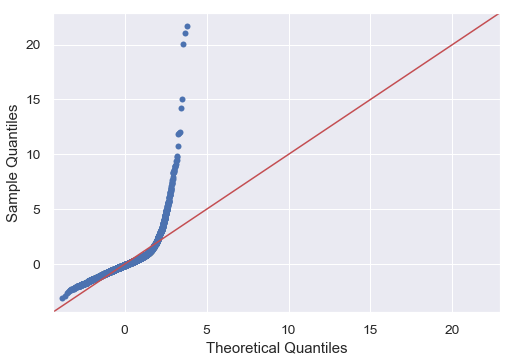

In [1058]:
resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

In [1049]:
#removing outliers

In [1052]:
data_pred.head()

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
7245,6,8.00,27600,2.5,4,13,8570,3480.0,0
3910,5,4.50,37325,2.0,3,11,7680,2360.0,1
9245,6,7.75,31374,2.0,3,13,8860,1030.0,3
1446,5,5.00,23985,2.0,3,12,6720,1280.0,3
1162,5,5.25,45517,2.0,3,12,5990,2020.0,3


In [1053]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_pred))
print(z)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS